In [1]:
#Brittany Roberts
#DSC410
#Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

disease_data = pd.read_csv("C:\\Users\\Brittany\\OneDrive - Bellevue University\\Data Sources\\Disease_symptom_and_patient_profile_dataset.csv")
disease_data

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


Univariate EDA for Categorical Data

     count  percent
Yes    175     50.1
No     174     49.9


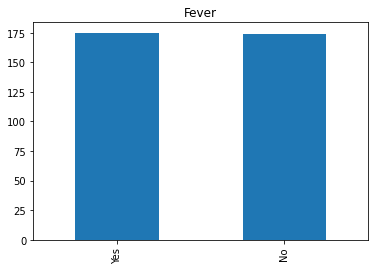

In [2]:
count = disease_data['Fever'].value_counts()
percent = 100*disease_data['Fever'].value_counts(normalize=True)
df=pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title = 'Fever');

     count  percent
No     182     52.1
Yes    167     47.9


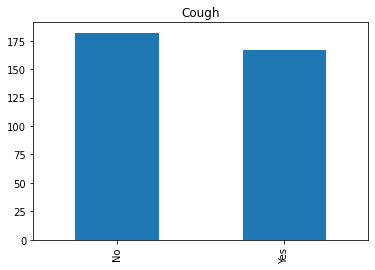

In [3]:
count = disease_data['Cough'].value_counts()
percent = 100*disease_data['Cough'].value_counts(normalize=True)
df=pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title = 'Cough');

     count  percent
Yes    242     69.3
No     107     30.7


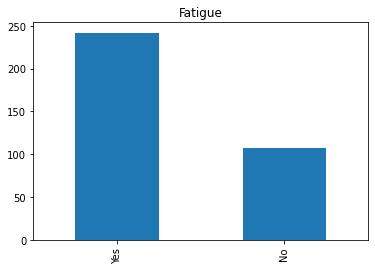

In [4]:
count = disease_data['Fatigue'].value_counts()
percent = 100*disease_data['Fatigue'].value_counts(normalize=True)
df=pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title = 'Fatigue');

     count  percent
No     261     74.8
Yes     88     25.2


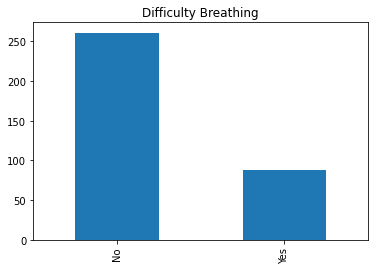

In [5]:
count = disease_data['Difficulty Breathing'].value_counts()
percent = 100*disease_data['Difficulty Breathing'].value_counts(normalize=True)
df=pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title = 'Difficulty Breathing');

        count  percent
Female    176     50.4
Male      173     49.6


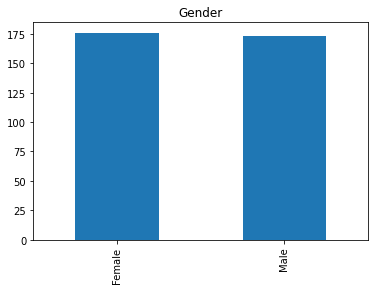

In [6]:
count = disease_data['Gender'].value_counts()
percent = 100*disease_data['Gender'].value_counts(normalize=True)
df=pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title = 'Gender');

        count  percent
High      167     47.9
Normal    164     47.0
Low        18      5.2


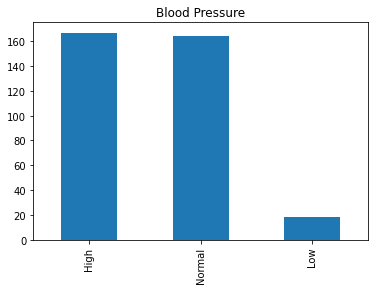

In [7]:
count = disease_data['Blood Pressure'].value_counts()
percent = 100*disease_data['Blood Pressure'].value_counts(normalize=True)
df=pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title = 'Blood Pressure');

        count  percent
High      166     47.6
Normal    149     42.7
Low        34      9.7


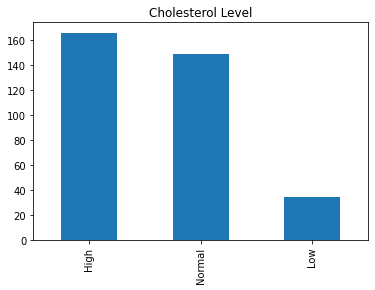

In [8]:
count = disease_data['Cholesterol Level'].value_counts()
percent = 100*disease_data['Cholesterol Level'].value_counts(normalize=True)
df=pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title = 'Cholesterol Level');

          count  percent
Positive    186     53.3
Negative    163     46.7


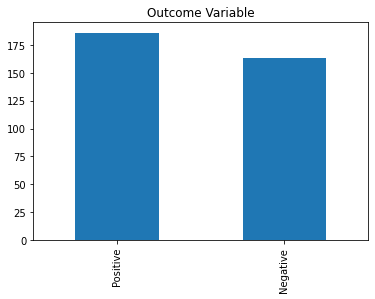

In [9]:
count = disease_data['Outcome Variable'].value_counts()
percent = 100*disease_data['Outcome Variable'].value_counts(normalize=True)
df=pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title = 'Outcome Variable');

Univariate EDA for Numerical Data

In [10]:
def desc_num_feature(feature_name, bins=30, edgecolor='k', **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    disease_data[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature_name, size=15)
    plt.figtext(1,0.15, str(disease_data[feature_name].describe().round(2).astype(str)), size=17)

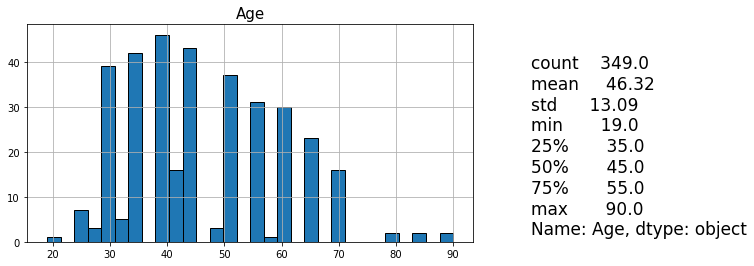

In [11]:
desc_num_feature('Age')

Model PreProcessing

Check for null values

In [12]:
print('NaN Count for Fever:', disease_data['Fever'].isnull().sum())
print('NaN Count for Cough:', disease_data['Cough'].isnull().sum())
print('NaN Count for Fatigue:', disease_data['Fatigue'].isnull().sum())
print('NaN Count for Difficulty Breathing:', disease_data['Difficulty Breathing'].isnull().sum())
print('NaN Count for Gender:', disease_data['Gender'].isnull().sum())
print('NaN Count for Blood Pressure:', disease_data['Blood Pressure'].isnull().sum())
print('NaN Count for Cholesterol:', disease_data['Cholesterol Level'].isnull().sum())

NaN Count for Fever: 0
NaN Count for Cough: 0
NaN Count for Fatigue: 0
NaN Count for Difficulty Breathing: 0
NaN Count for Gender: 0
NaN Count for Blood Pressure: 0
NaN Count for Cholesterol: 0


Count of each disease to help with training

In [13]:
count = disease_data['Disease'].value_counts()
percent = 100*disease_data['Disease'].value_counts(normalize=True)
df=pd.DataFrame({'count':count, 'percent':percent.round(1)})
df

,count,percent
Asthma,23,6.6
Stroke,16,4.6
Osteoporosis,14,4.0
Hypertension,10,2.9
Diabetes,10,2.9
...,...,...
Autism Spectrum Disorder (ASD),1,0.3
Hypoglycemia,1,0.3
Fibromyalgia,1,0.3
"Eating Disorders (Anorexia,...",1,0.3


In [14]:
df_10 = df.iloc[:10]
df_10

,count,percent
Asthma,23,6.6
Stroke,16,4.6
Osteoporosis,14,4.0
Hypertension,10,2.9
Diabetes,10,2.9
Migraine,10,2.9
Influenza,8,2.3
Pneumonia,8,2.3
Bronchitis,8,2.3
Hyperthyroidism,7,2.0


Ordinal encoding for Fever, Cough, Fatigue, Difficulty Breathing, Blood Pressure, and Cholesterol Level
    Doing ordinal encoding for these factors because if the patient is positive or negative or fever, cough,
    fatigue, and difficulty breathing then that is a symptom used to diagnose the patient.  With blood pressure
    and cholesterol having more than two variables and the degree of each of those levels can change the diagnosis,
    I want the values to be ranked accordingly.

In [15]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

disease_data['encoded_Fever'] = oe.fit_transform(disease_data[['Fever']]).astype(int)
#disease_data

In [16]:
disease_data['encoded_Cough'] = oe.fit_transform(disease_data[['Cough']]).astype(int)
disease_data['encoded_Fatigue'] = oe.fit_transform(disease_data[['Fatigue']]).astype(int)
disease_data['encoded_DB'] = oe.fit_transform(disease_data[['Difficulty Breathing']]).astype(int)
disease_data['encoded_BP'] = oe.fit_transform(disease_data[['Blood Pressure']]).astype(int)
disease_data['encoded_CL'] = oe.fit_transform(disease_data[['Cholesterol Level']]).astype(int)
#disease_data

Using label encoding on Gender as there is ranking in the labeling, just transforming them to work in model.

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

disease_data['encoded_Gender'] = le.fit_transform(disease_data[['Gender']])
#disease_data

C:\Users\Brittany\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Changing top 10 diseases diagnosed to numerical values to use them in model.

In [18]:
disease_data = disease_data.replace({'Asthma':'1',
                                     'Stroke':'2',
                                     'Osteoporosis':'3',
                                     'Hypertension':'4',
                                     'Diabetes':'5',
                                     'Migraine':'6',
                                     'Influenza':'7',
                                     'Pneumonia':'8',
                                     'Bronchitis':'9',
                                     'Hyperthyroidism':'10'})

Dropping columns not being used in model

Dropping these columns to make it easier to run model - original columns that were encoded, age and outcome variable.

In [19]:
disease_df = disease_data[['encoded_Fever', 'encoded_Cough','encoded_Fatigue', 'encoded_DB', 'encoded_BP', 'encoded_CL', 'encoded_Gender', 'Disease']].copy()
disease_df

,encoded_Fever,encoded_Cough,encoded_Fatigue,encoded_DB,encoded_BP,encoded_CL,encoded_Gender,Disease
0,1,0,1,1,1,2,0,7
1,0,1,1,0,2,2,0,Common Cold
2,0,1,1,0,2,2,0,Eczema
3,1,1,0,1,2,2,1,1
4,1,1,0,1,2,2,1,1
...,...,...,...,...,...,...,...,...
344,1,0,1,0,0,0,0,2
345,1,0,1,0,0,0,1,2
346,1,0,1,0,0,0,1,2
347,1,0,1,0,0,0,0,2


Dropping rows of disease that are not in the top 10 for count.

In [20]:
new_df = disease_df[(disease_df['Disease'] == '1') | (disease_df['Disease'] == '2') | (disease_df['Disease'] == '3')
                      | (disease_df['Disease'] == '4') | (disease_df['Disease'] == '5') | (disease_df['Disease'] == '6')
                      | (disease_df['Disease'] == '7') | (disease_df['Disease'] == '8') | (disease_df['Disease'] == '9') | (disease_df['Disease'] == '10')]
new_df

,encoded_Fever,encoded_Cough,encoded_Fatigue,encoded_DB,encoded_BP,encoded_CL,encoded_Gender,Disease
0,1,0,1,1,1,2,0,7
3,1,1,0,1,2,2,1,1
4,1,1,0,1,2,2,1,1
6,1,1,1,1,2,2,0,7
7,1,1,1,1,2,2,0,7
...,...,...,...,...,...,...,...,...
344,1,0,1,0,0,0,0,2
345,1,0,1,0,0,0,1,2
346,1,0,1,0,0,0,1,2
347,1,0,1,0,0,0,0,2


Implementing and Evaluating Different Models

Training model with first 50 rows of dataset and testing with the rest of the dataset

In [21]:
X_train = new_df.iloc[:50].drop(columns=['Disease'])
X_test = new_df.iloc[50:].drop(columns=['Disease'])
y_train = new_df['Disease'].iloc[:50]
y_test = new_df['Disease'].iloc[50:]

Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

class_tree = DecisionTreeClassifier()
model_DT = class_tree.fit(X_train, y_train)

In [23]:
y_pred_DT = model_DT.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_DT = accuracy_score(y_test, y_pred_DT)
accuracy_DT

0.078125

In [25]:
from sklearn.metrics import precision_score

precision_dt = precision_score(y_test, y_pred_DT, average='weighted')
precision_dt

C:\Users\Brittany\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.03718434343434343

In [26]:
from sklearn.metrics import recall_score

recall_dt = recall_score(y_test, y_pred_DT, average='weighted')
recall_dt

0.078125

In [27]:
from sklearn.metrics import f1_score

f1_dt = f1_score(y_test, y_pred_DT, average='weighted')
f1_dt

0.04595178372352285

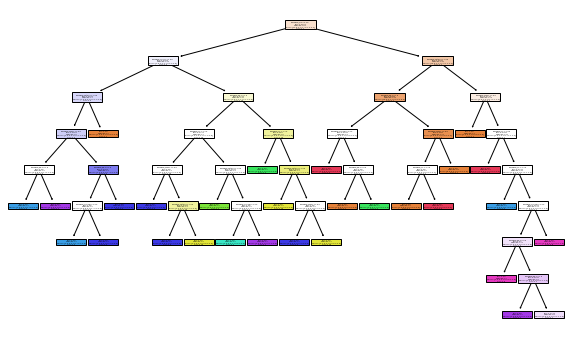

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X = disease_df.drop(columns=['Disease'])
plt.figure(figsize=(10, 6))
plot_tree(model_DT, filled=True, feature_names=X.columns, class_names=list(map(str, model_DT.classes_)))
plt.show()

Random Forests

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
model_rf = rf.fit(X_train, y_train)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_pred_rf, y_test)
accuracy_rf

In [ ]:
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
precision_rf

In [ ]:
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
recall_rf

In [ ]:
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
f1_rf

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model_knn = knn.fit(X_train, y_train)

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
accuracy_knn = accuracy_score(y_pred_knn, y_test)
accuracy_knn

In [ ]:
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
precision_knn

In [ ]:
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
recall_knn

In [ ]:
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
f1_knn

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
model_lr = log.fit(X_train, y_train)

In [ ]:
y_pred_log = log.predict(X_test)

In [ ]:
accuracy_lr = accuracy_score(y_pred_log, y_test)
accuracy_lr

In [ ]:
precision_lr = precision_score(y_test, y_pred_log, average='weighted')
precision_lr

In [ ]:
recall_lr = recall_score(y_test, y_pred_log, average='weighted')
recall_lr

In [ ]:
f1_lr = f1_score(y_test, y_pred_log, average='weighted')
f1_lr

Naives Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
model_nb = nb.fit(X_train, y_train)

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
accuracy_nb = accuracy_score(y_pred_nb, y_test)
accuracy_nb

In [ ]:
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
precision_nb

In [ ]:
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
recall_nb

In [ ]:
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
f1_nb

Based on accuracy score, precision, recall and f1-score, the Random Forest Model is the best model to use.

Validation of Model

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)
cm

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1', 'Pred 2', 'Pred 3', 'Pred 4', 'Pred 5', 'Pred 6', 'Pred 7', 'Pred 8', 'Pred 9'],
            yticklabels=['Test 0', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Test 6', 'Test 7', 'Test 8', 'Test 9'])
plt.xlabel('Predicted')
plt.ylabel('Tested')
plt.show()

Overall, even thought the model is not very precise I am happy I was able to create it.  Now, since I have more knowledge than when I started this course.  I believe I might make this so I can predicted whether or not there will be a postiive patient outcome depending on the diagnois and/or symptoms.